In [1]:
import paleoscripts as ps

In [2]:
delta_u, delta_v = ps.wind_anomaly(base_dir='/home/alhafisu/project/experiments',
                 control='hosv1', 
                 experiment='1hosv',
                 nyears_avg=25, start_year=5001, spinup_years=25, 
                 season='djf')

case: hosv1 var: vmo run: 0 beg_year: 5026 end_year: 5050
case: hosv1 var: vmo run: 1 beg_year: 5126 end_year: 5150
case: hosv1 var: vmo run: 2 beg_year: 5226 end_year: 5250
case: hosv1 var: tax run: 0 beg_year: 5026 end_year: 5050
case: hosv1 var: tax run: 1 beg_year: 5126 end_year: 5150
case: hosv1 var: tax run: 2 beg_year: 5226 end_year: 5250
case: hosv1 var: tay run: 0 beg_year: 5026 end_year: 5050
case: hosv1 var: tay run: 1 beg_year: 5126 end_year: 5150
case: hosv1 var: tay run: 2 beg_year: 5226 end_year: 5250
case: 1hosv var: vmo run: 0 beg_year: 5076 end_year: 5100
case: 1hosv var: vmo run: 1 beg_year: 5176 end_year: 5200
case: 1hosv var: vmo run: 2 beg_year: 5276 end_year: 5300
case: 1hosv var: tax run: 0 beg_year: 5076 end_year: 5100
case: 1hosv var: tax run: 1 beg_year: 5176 end_year: 5200
case: 1hosv var: tax run: 2 beg_year: 5276 end_year: 5300
case: 1hosv var: tay run: 0 beg_year: 5076 end_year: 5100
case: 1hosv var: tay run: 1 beg_year: 5176 end_year: 5200
case: 1hosv va

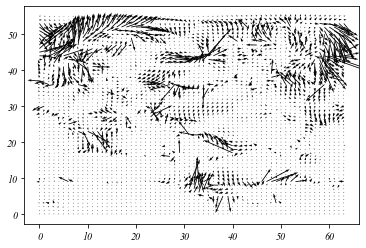

In [3]:
import matplotlib.pyplot as plt
plt.quiver(delta_u, delta_v)

In [4]:
import metpy.calc as mpcalc
# Calculate the total deformation of the flow
div = mpcalc.divergence(delta_u, delta_v)
sigma = 10.0
divSmooth1 = mpcalc.smooth_gaussian(div, sigma)
scale = 1e6
divSmooth1 = divSmooth1 * scale
minDiv = divSmooth1.min().values
maxDiv = divSmooth1.max().values
print (minDiv, maxDiv)

-9.171400473961285 12.192483310456469


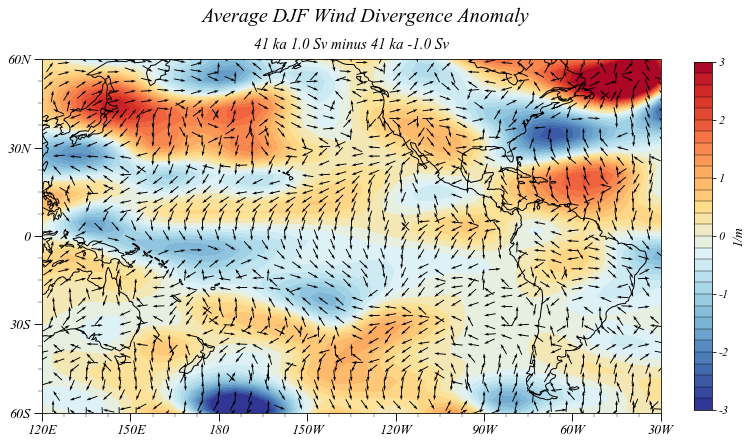

In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
from matplotlib import font_manager
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
import cmaps

import geocat.viz as gv
import paleoscripts as ps

fig = plt.figure(figsize=[12,8])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude= 180))

cmap = cmaps.cmp_b2r
# add land feature
ax.add_feature(cfeature.LAND, facecolor="lightgrey", zorder=1)


gv.set_titles_and_labels(ax,
                         maintitle="",
                         maintitlefontsize=18,
                         #lefttitle="Surface Temperature",
                         lefttitlefontsize=18,
                         #righttitle="Kelvin",
                         righttitlefontsize=18)

# Format tick labels as latitude and longitudes
gv.add_lat_lon_ticklabels(ax=ax)

# Use geocat-viz utility function to customize tick marks
gv.set_axes_limits_and_ticks(ax,
                             xlim=(-60, 150),
                             ylim=(-60, 60),
                             xticks=(-60, -30, 0, 30, 60, 90, 120, 150),
                             yticks=(-60, -30, 0, 30, 60))
                             

# Remove degree symbol from tick labels
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))

# Add minor tick marks
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=4,
                         y_minor_per_major=4,
                         labelsize=14)

   # Make sure that tick marks are only on the left and bottom sides of subplot
ax.tick_params('both', which='both', top=False, right=False)


#year=['*']

#month=['01','02','03','04','05','06','07','08','09','10','11','12']
#for i in range(0,100):              # loop over the first dimention (years)
    #for j in range(0,12): 
       #var = dsc.tsc[i,j,:,:]   # get the variable, for each time slice

bounds = [-3, -2.8, -2.6, -2.4, -2.2, -2, -1.8, -1.6, -1.4, -1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 
          0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3]        
vmo_plot = divSmooth1.plot.contourf(
                             ax=ax,
                             transform=ccrs.PlateCarree(),
                             #levels=np.linspace(-1, 1, 21),
                              #levels=np.linspace(-2, 2, 21),
                              levels=bounds,
                             #levels=np.linspace(-3,3,31),
                             #levels=np.linspace(-5, 5, 21),
                             cmap=cmap,
                             add_colorbar=False)  

#ka241-pind3 DJF
#colorbounds = np.linspace(-1, 1, 21)
#colorbounds = np.linspace(-5, 5, 21)
#max41-min41 DJF &nhp41-kap41
#colorbounds = np.linspace(-3, 3, 31)
#colorbounds = np.linspace(-2, 2, 21)
    # Add colorbar for all four plots
norm=mcolors.BoundaryNorm(bounds, cmap.N)
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)

# Add and customize colorbar
#max41-min41 DJF &nhp41-kap41
#cbar_ticks = (-2, -1, 0, 1, 2)
cbar_ticks = (-3, -2, -1, 0, 1, 2, 3)
#cbar_ticks = (-1,-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1)
#ka41-pind3 DJF
#cbar_ticks = (-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5)

cbar = plt.colorbar(ax=ax,
             norm=norm,
             mappable=mappable,
             boundaries=bounds,
             extendrect=False,
             extendfrac='auto',
             #extend='both',       
             ticks=cbar_ticks,
             drawedges=True,
             label= '',
             fraction=0.026)

cbar.set_label("1/m", size=14)
cbar.ax.tick_params(labelsize=12)
#year_index = i

#month_index = j
d_windspeed = (delta_u**2 + delta_v**2) ** 0.5   

u_norm = delta_u / d_windspeed
v_norm = delta_v / d_windspeed

ax.quiver(u_norm.longitude, 
          u_norm.latitude, 
          u_norm.data,  #[year_index,month_index], 
          v_norm.data,  #[year_index, month_index],
          color='black',
          transform=ccrs.PlateCarree(),
          pivot='tip',
          width=.0015,
          scale_units='xy',
          angles='xy',
          alpha=1,
          #scale=0.4,
          scale=0.25)

ax.coastlines()
plt.rcParams['axes.unicode_minus'] = False
plt.suptitle("Average DJF Wind Divergence Anomaly", y= 0.90, size=20)
#plt.title("SH Summer Perihelion 0.4 Sv minus SH Summer Perihelion -0.4 Sv", size=15, pad=10)
#plt.title("Maximum Obliquity 0.4 Sv minus Maximum Obliquity -0.4 Sv ", size=15, pad=10)
plt.title("41 ka 1.0 Sv minus 41 ka -1.0 Sv", size=15, pad=10)
#plt.title("Expt= kap41-nhp41", loc = "left", size=15, pad=10)
#plt.title("DJF", loc = "right", size=15, pad=10)
ax.xaxis.set_label_text('')
ax.xaxis.label.set_visible(False)
ax.yaxis.set_label_text('')
ax.yaxis.label.set_visible(False)
# ax.set_xlabel('Longitude [degrees_east]', fontsize=20, labelpad=18)
# ax.set_ylabel('Latitude [degrees_north]', fontsize=20, labelpad=18)
# plt.savefig("/home/alhafisu/project/projections/wind divergence anomaly ka241-pind3.svg", bbox_inches='tight', dpi=600)
# plt.savefig("/home/alhafisu/project/projections/wind divergence anomaly ka241-pind3.pdf", bbox_inches='tight', dpi=600)
# plt.savefig("/home/alhafisu/project/projections/wind divergence anomaly ka241-pind3.tiff", bbox_inches='tight', dpi=600)
plt.show()